In [76]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import datetime
import pickle

%matplotlib inline
sns.set(color_codes=True)
pd.set_option('display.max_columns', 100)

In [77]:
train_data = pd.read_csv('ml_case_training_data.csv')
churn_data = pd.read_csv('ml_case_training_output.csv')
history_data = pd.read_csv('ml_case_training_hist_data.csv')

In [78]:
train_data.head(3)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,07-11-2012,06-11-2016,NaN,07-11-2012,09-11-2015,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,15-06-2013,15-06-2016,NaN,NaN,23-06-2015,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,21-08-2009,30-08-2016,NaN,21-08-2009,31-08-2015,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800


In [79]:
churn_data.head(3)

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0


In [80]:
train = pd.merge(train_data, churn_data, on="id")

In [81]:
train.tail(5)

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
16091,18463073fb097fc0ac5d3e040f356987,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,32270,47940,0,24-05-2012,08-05-2016,NaN,08-05-2015,26-05-2014,NaN,NaN,NaN,NaN,4648.01,0,0.0,18.57,0.138305,0.000000,44.311378,t,0.00,27.88,27.88,2,381.77,4,lxidpiddsbxsbosboudacockeimpuepw,15.000,0
16092,d0a6f71671571ed83b2645d23af6de00,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,7223,0,181,27-08-2012,27-08-2016,27-08-2012,27-08-2012,28-08-2015,68.64,68.64,1254.65,15.94,631.69,181,0.0,144.03,0.100167,0.091892,58.995952,f,15.94,0.00,0.00,1,90.34,3,lxidpiddsbxsbosboudacockeimpuepw,6.000,1
16093,10e6828ddd62cbcf687cb74928c4c2d2,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,1844,0,179,08-02-2012,07-02-2016,NaN,08-02-2012,09-02-2015,NaN,NaN,NaN,NaN,190.39,179,0.0,129.60,0.116900,0.100015,40.606701,f,18.05,39.84,39.84,1,20.38,4,lxidpiddsbxsbosboudacockeimpuepw,15.935,1
16094,1cf20fd6206d7678d5bcafd28c53b4db,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,131,0,0,30-08-2012,30-08-2016,NaN,30-08-2012,31-08-2015,NaN,NaN,NaN,NaN,19.34,0,0.0,7.18,0.145711,0.000000,44.311378,f,0.00,13.08,13.08,1,0.96,3,lxidpiddsbxsbosboudacockeimpuepw,11.000,0
16095,563dde550fd624d7352f3de77c0cdfcd,NaN,NaN,NaN,8730,0,0,18-12-2009,17-12-2016,NaN,18-12-2009,21-12-2015,NaN,NaN,NaN,NaN,762.41,0,0.0,1.07,0.167086,0.088454,45.311378,f,0.00,11.84,11.84,1,96.34,6,ldkssxwpmemidmecebumciepifcamkci,10.392,0


### General Statistics of dataframe

In [82]:
pd.DataFrame({"Data type":train.dtypes})

,Data type
id,object
activity_new,object
campaign_disc_ele,float64
channel_sales,object
cons_12m,int64
cons_gas_12m,int64
cons_last_month,int64
date_activ,object
date_end,object
date_first_activ,object


In [83]:
pd.DataFrame(history_data.dtypes, columns=["Data Type"])

,Data Type
id,object
price_date,object
price_p1_var,float64
price_p2_var,float64
price_p3_var,float64
price_p1_fix,float64
price_p2_fix,float64
price_p3_fix,float64


In [84]:
train.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000,16096.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131,0.099093
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421,0.298796
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000,0.000000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000,0.000000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000,0.000000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000,1.000000


**Some key points from above statistics**  
1) The minimum consumption and forecasts for electricity and gas (yearly and monthly) are negative. This could mean that the client companies are producing energy and therefore energy should be "returned", although it is unlikely and we will consider it as corrupted data.  
2) The campaign_disc_ele is an empty column. We verify it later.  
3) Highly skewed data when we look at the percentiles.
 

In [85]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


### Missing Data

In [86]:
pd.DataFrame({"Missing values (%)": train.isnull().sum()/len(train.index)* 100})

,Missing values (%)
id,0.000000
activity_new,59.300447
campaign_disc_ele,100.000000
channel_sales,26.205268
cons_12m,0.000000
cons_gas_12m,0.000000
cons_last_month,0.000000
date_activ,0.000000
date_end,0.012425
date_first_activ,78.205765


Some of the columns should be removed as they have more than 75% of the data missing

In [87]:
pd.DataFrame({"Missing values (%)": history_data.isnull().sum()/len(history_data.index)* 100})

,Missing values (%)
id,0.000000
price_date,0.000000
price_p1_var,0.704138
price_p2_var,0.704138
price_p3_var,0.704138
price_p1_fix,0.704138
price_p2_fix,0.704138
price_p3_fix,0.704138


In this case the missing data is very small, so we might be able to easily replace the missing values with approximations

## Data visualization

### Churn

In [88]:
churn = train[['id', 'churn']]

In [89]:
churn.columns = ["Companies", "churn"]

In [90]:
def plot_stacked_bars(dataframe, title_, size_=(18,10), rot_=0, legend_="upper right"):
    ax = dataframe.plot(kind="bar",
                       stacked=True,
                        figsize=size_,
                        rot=rot_,
                        title=title_)
    annotate_stacked_bars(ax, textsize=14)
    plt.legend(["Retention", "Churn"], loc=legend_)
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax,pad=0.99,color="white", textsize=13):
    for p in ax.patches:
        value=str(round(p.get_height(),1))
        if value == '0.0':
            continue
        ax.annotate(value,
                   ((p.get_x() + p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
                    color=color,
                    size=textsize
            
                   )


In [91]:
churn_total = churn.groupby(churn["churn"]).count()
churn_percentage = churn_total/churn_total.sum() * 100

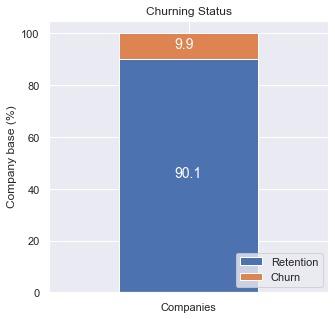

In [92]:
plot_stacked_bars(churn_percentage.transpose(), "Churning Status", (5,5), legend_="lower right")

### SME activity

In [93]:
activity = train[["id", "activity_new", "churn"]]

In [94]:
activity = activity.groupby([activity["activity_new"],
                            activity["churn"]])["id"].count().unstack(level=1).sort_values(by=[0], ascending=False)

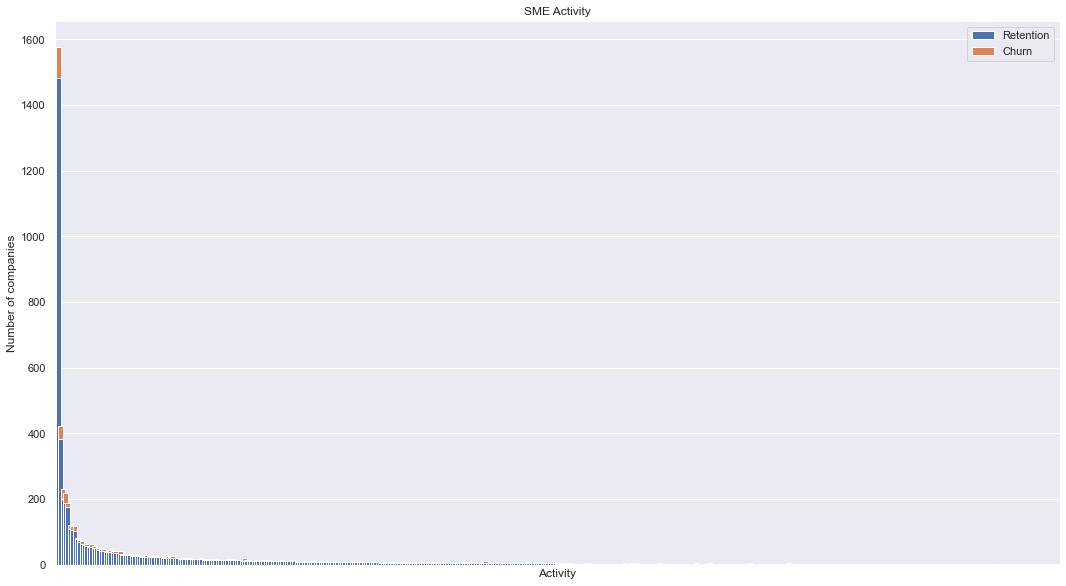

In [95]:
activity.plot(kind="bar",
             figsize=(18,10),
              width=2,
              stacked=True,
              title="SME Activity"
             )
plt.ylabel("Number of companies")
plt.xlabel("Activity")
plt.legend(["Retention", "Churn"], loc="upper right")
plt.xticks([])
plt.show()

In [96]:
activity_total = activity.fillna(0)[0] + activity.fillna(0)[1]
activity_percentage = activity.fillna(0)[1]/(activity_total)*100
pd.DataFrame({"Percentage churn":activity_percentage,
             "Total companies": activity_total }).sort_values(by="Percentage churn", ascending=False).head(10)

,Percentage churn,Total companies
activity_new,,
xwkaesbkfsacseixxksofpddwfkbobki,100.000000,1.0
wkwdccuiboaeaalcaawlwmldiwmpewma,100.000000,1.0
ikiucmkuisupefxcxfxxulkpwssppfuo,100.000000,1.0
opoiuuwdmxdssidluooopfswlkkkcsxf,100.000000,1.0
pfcocskbxlmofswiflsbcefcpufbopuo,100.000000,2.0
oeacexidmflusdkwuuicmpiaklkxulxm,100.000000,1.0
wceaopxmdpccxfmcdpopulcaubcxibuw,100.000000,1.0
kmlwkmxoocpieebifumobckeafmidpxf,100.000000,1.0
cwouwoubfifoafkxifokoidcuoamebea,66.666667,3.0


If sorted by activity some companies have churned a 100% but this is due to the fact that only a few companies belong to that activity.


### Sales channel

In [97]:
channel = train[["id", "channel_sales", "churn"]]

In [98]:
channel = channel.groupby([channel["channel_sales"],
                          channel["churn"]])["id"].count().unstack(level=1).fillna(0)

In [99]:
channel_churn = (channel.div(channel.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

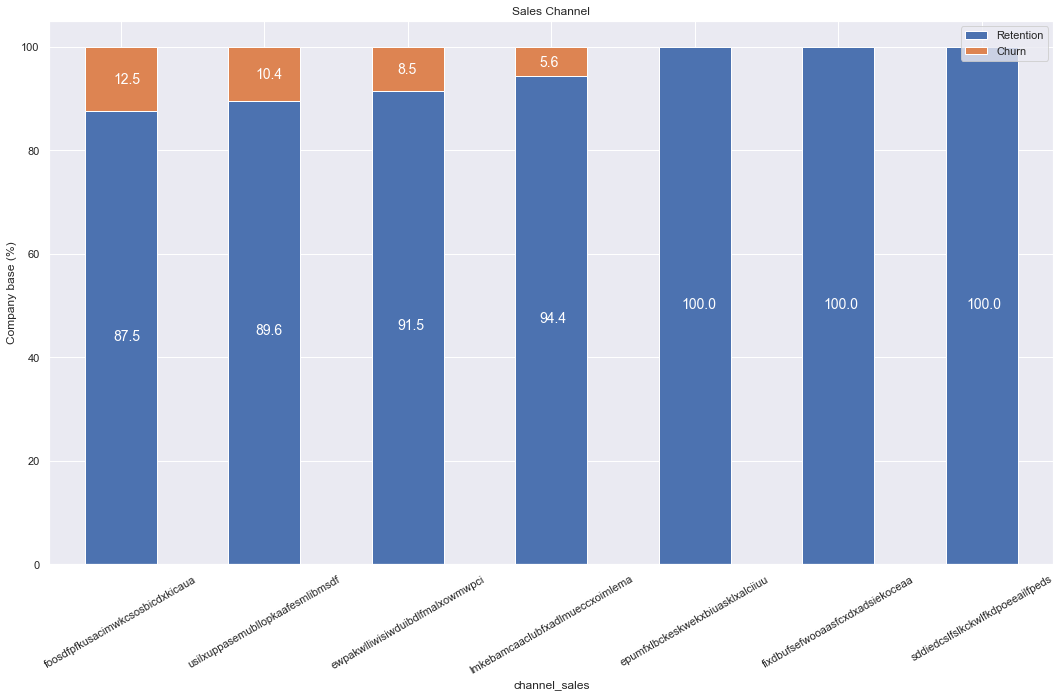

In [100]:
plot_stacked_bars(channel_churn, "Sales Channel", rot_=30)

In [101]:
channel_total = channel.fillna(0)[0]+channel.fillna(0)[1]
channel_percentage = channel.fillna(0)[1] / (channel_total) * 100
pd.DataFrame({"Churn percentage": channel_percentage,
             "Total companies": channel_total}).sort_values(by="Churn percentage",ascending=False).head(10)

,Churn percentage,Total companies
channel_sales,,
foosdfpfkusacimwkcsosbicdxkicaua,12.498306,7377.0
usilxuppasemubllopkaafesmlibmsdf,10.387812,1444.0
ewpakwlliwisiwduibdlfmalxowmwpci,8.488613,966.0
lmkebamcaaclubfxadlmueccxoimlema,5.595755,2073.0
epumfxlbckeskwekxbiuasklxalciiuu,0.000000,4.0
fixdbufsefwooaasfcxdxadsiekoceaa,0.000000,2.0
sddiedcslfslkckwlfkdpoeeailfpeds,0.000000,12.0


### Consumption

In [102]:
consumption = train[["id", "cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons", "has_gas", "churn"]]

In [103]:
def plot_distribution(dataframe, column, ax, bins_=50):
    temp = pd.DataFrame({"Retention":dataframe[dataframe["churn"]==0][column],
                        "Churn":dataframe[dataframe["churn"]==1][column]})
    temp[["Retention", "Churn"]].plot(kind="hist", bins=bins_, ax=ax, stacked=True)
    ax.set_xlabel(column)
    ax.ticklabel_format(style='plain', axis='x')

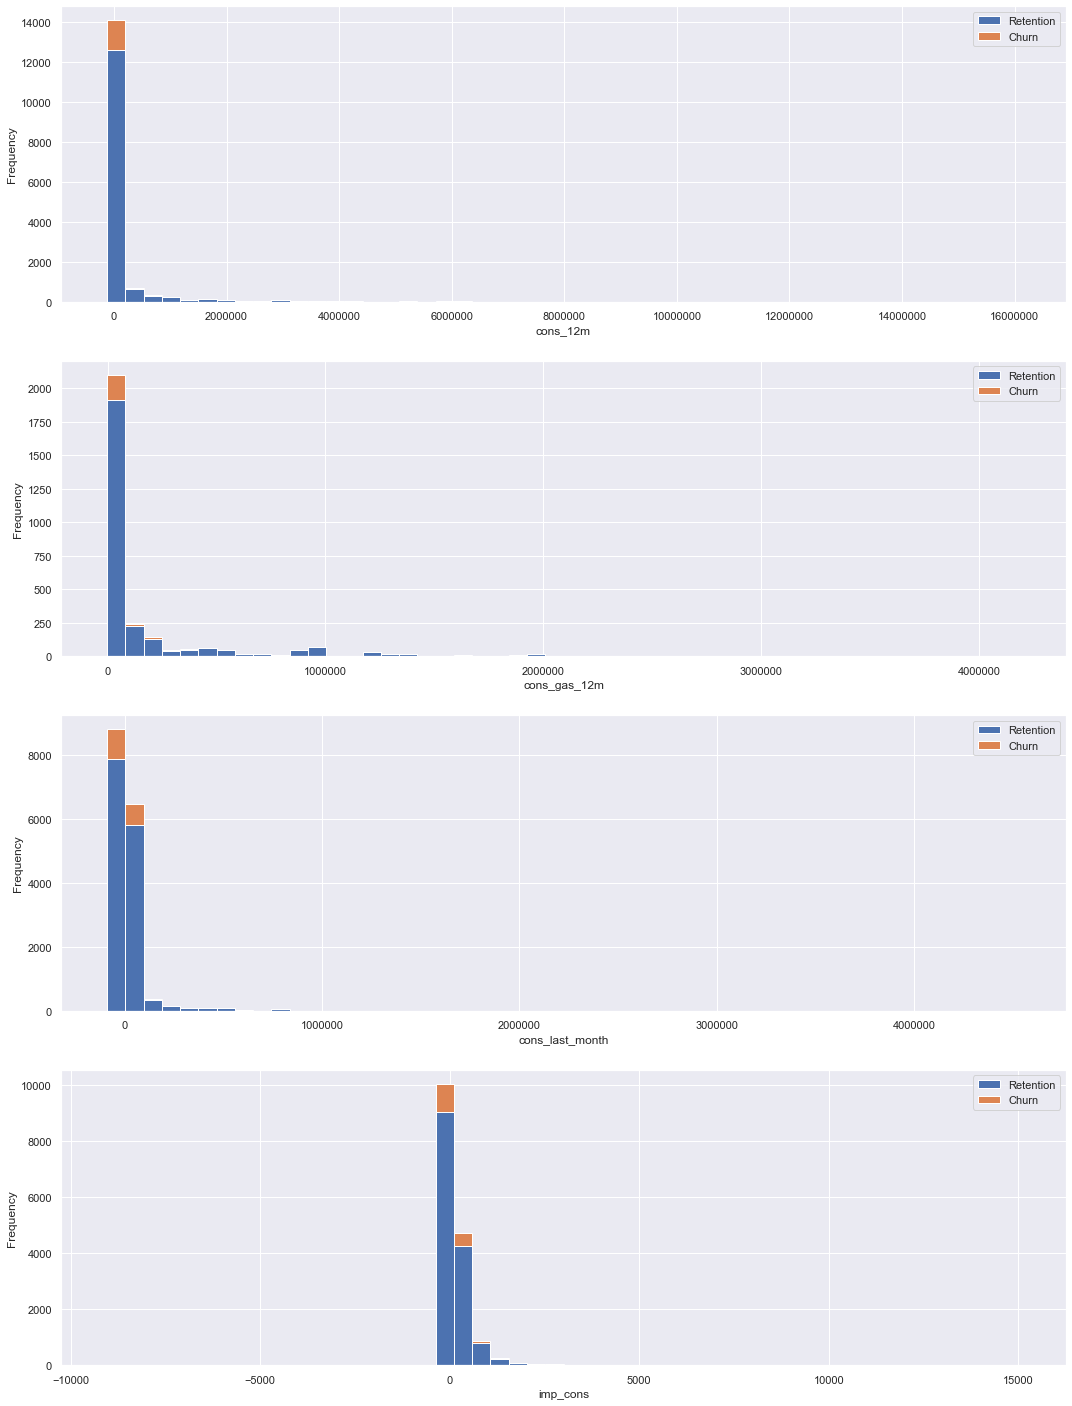

In [104]:
fig,axs = plt.subplots(nrows=4, figsize=(18,25))
plot_distribution(consumption, "cons_12m", axs[0])
plot_distribution(consumption[consumption["has_gas"]=="t"], "cons_gas_12m", axs[1])
plot_distribution(consumption, "cons_last_month", axs[2])
plot_distribution(consumption, "imp_cons", axs[3])

We can clearly see in here that the consumption data is highly skewed to the right, presenting a very long right-tail towards the higher values of the
distribution.

C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packa

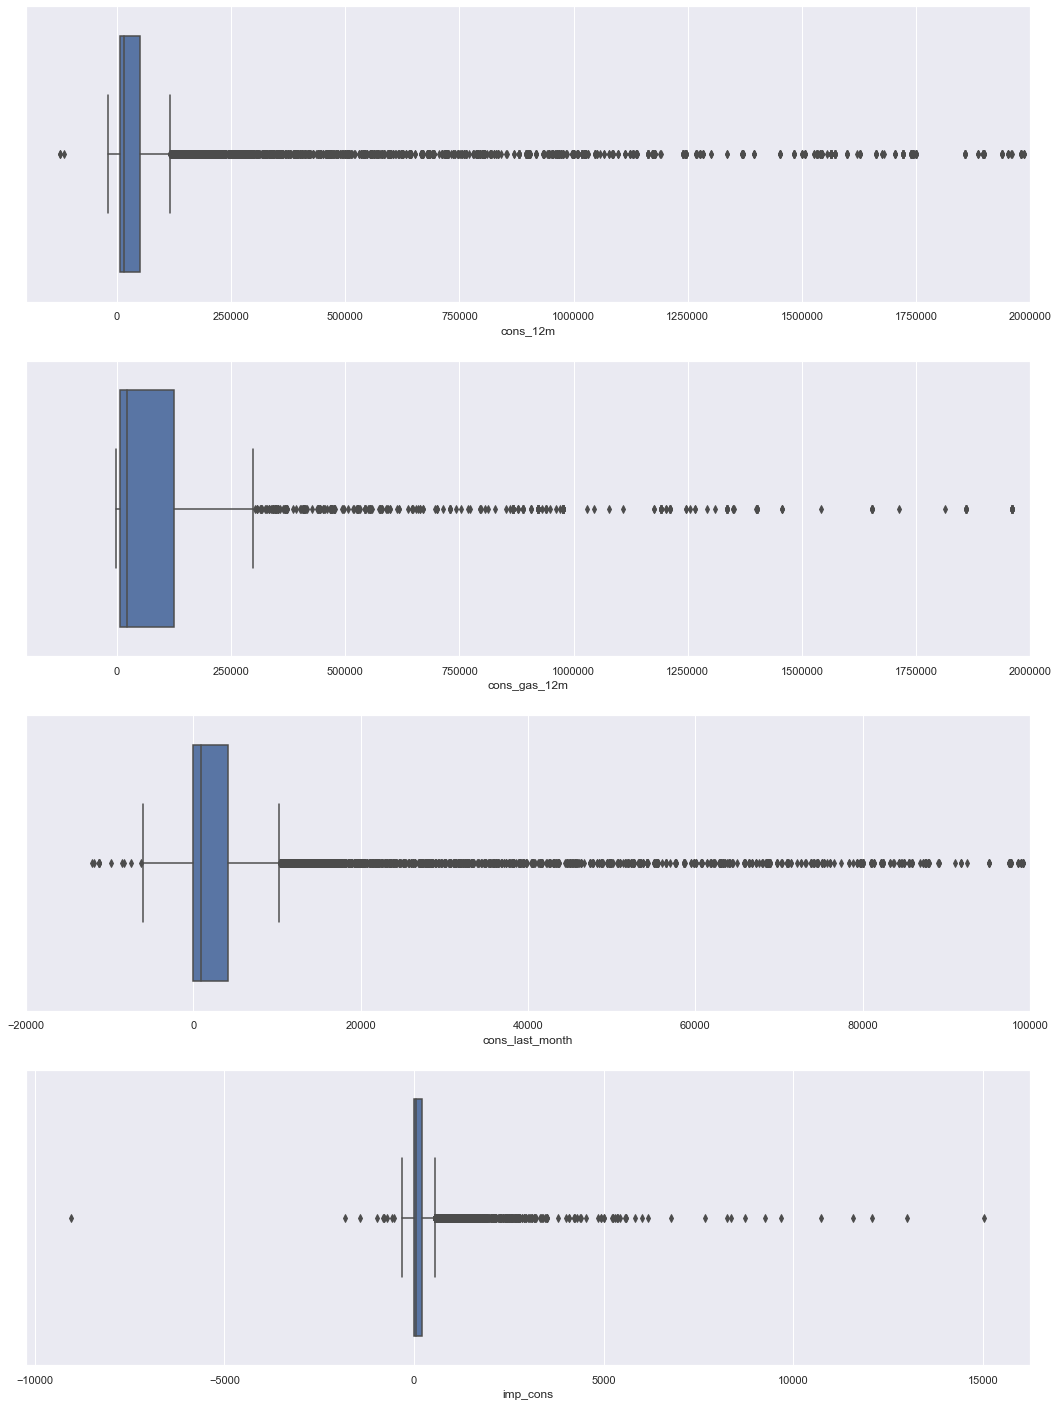

In [105]:
fig,axs = plt.subplots(nrows=4, figsize=(18,25))
sns.boxplot(consumption["cons_12m"], ax=axs[0])
sns.boxplot(consumption[consumption["has_gas"]=='t']["cons_gas_12m"], ax=axs[1])
sns.boxplot(consumption["cons_last_month"], ax=axs[2])
sns.boxplot(consumption["imp_cons"], ax=axs[3])

for ax in axs:
    ax.ticklabel_format(style="plain", axis="x")
axs[0].set_xlim(-200000,2000000)
axs[1].set_xlim(-200000,2000000)
axs[2].set_xlim(-20000,100000)
plt.show()

It is very clear now that we have a highly skewed distribution, and several outliers.

### Dates

In [106]:
dates = train[['id', 'date_activ', 'date_end', 'date_modif_prod', 'date_renewal', 'churn']].copy()


In [107]:
dates["date_activ"] = pd.to_datetime(dates["date_activ"], format='%d-%m-%Y')
dates["date_end"] = pd.to_datetime(dates["date_end"], format='%d-%m-%Y')
dates["date_modif_prod"] = pd.to_datetime(dates["date_modif_prod"], format='%d-%m-%Y')
dates["date_renewal"] = pd.to_datetime(dates["date_renewal"], format='%d-%m-%Y')


In [108]:
def plot_dates(dataframe, column, fontsize_=12):
    temp = dataframe[[column, "churn", "id"]].set_index(column).groupby([pd.Grouper(freq='M'), "churn"]).count().unstack(level=1)
    ax = temp.plot(kind="bar", stacked=True, figsize=(18,10), rot=0)
    ax.set_xticklabels(map(lambda x: line_format(x), temp.index))
    plt.xticks(fontsize=fontsize_)
    plt.ylabel("Number of companies")
    plt.legend(["Retention", "Churn"], loc="upper right")
    plt.show()
    
def line_format(label):
    month = label.month_name()[:1]
    if label.month_name() == "January":
        month += f'\n{label.year}'
    return month

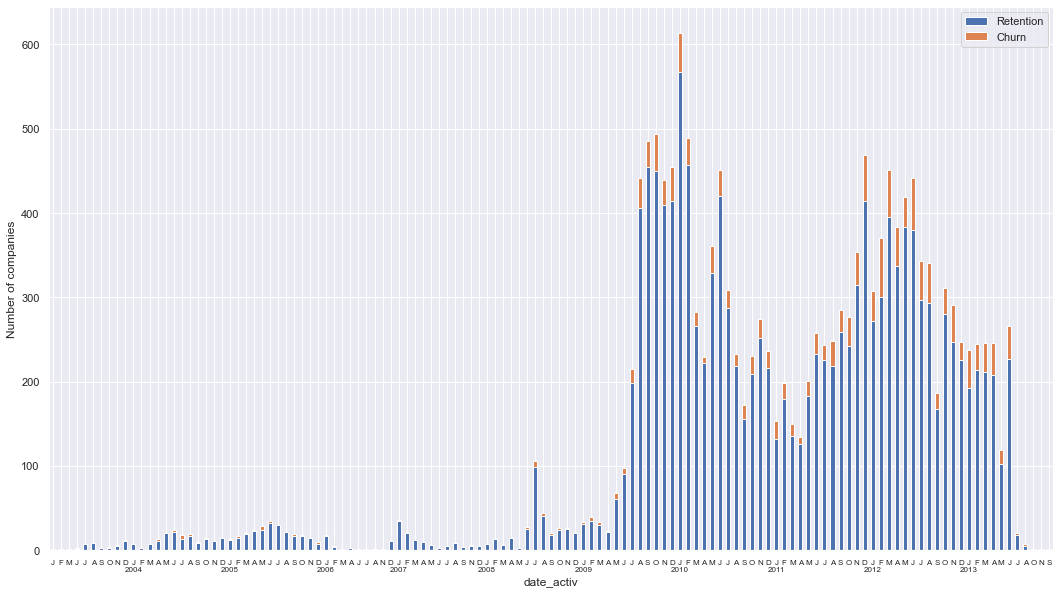

In [109]:
plot_dates(dates, "date_activ", fontsize_=8)

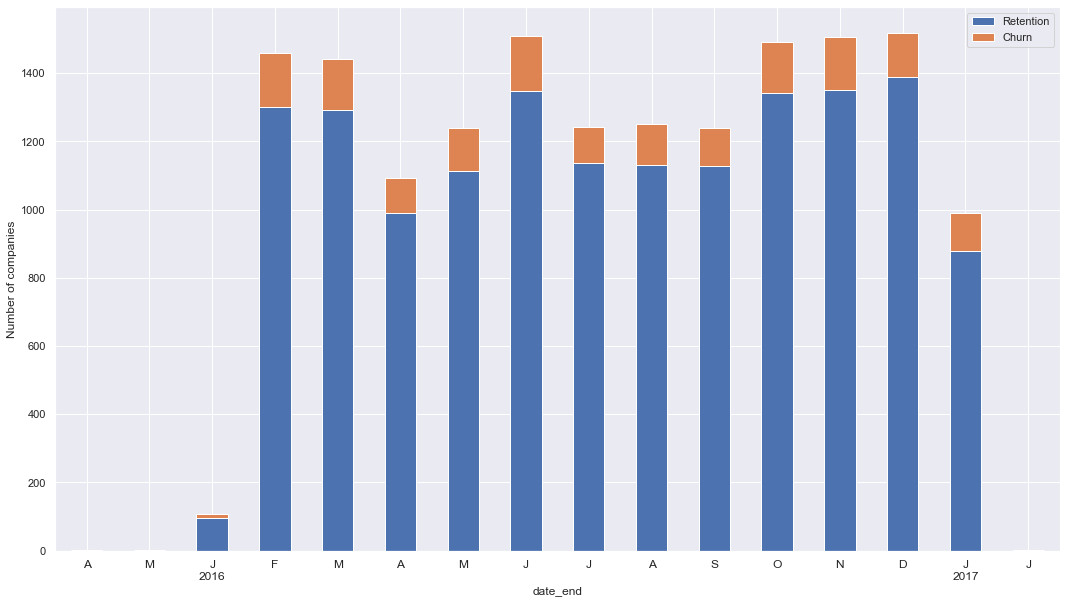

In [110]:
plot_dates(dates, "date_end")

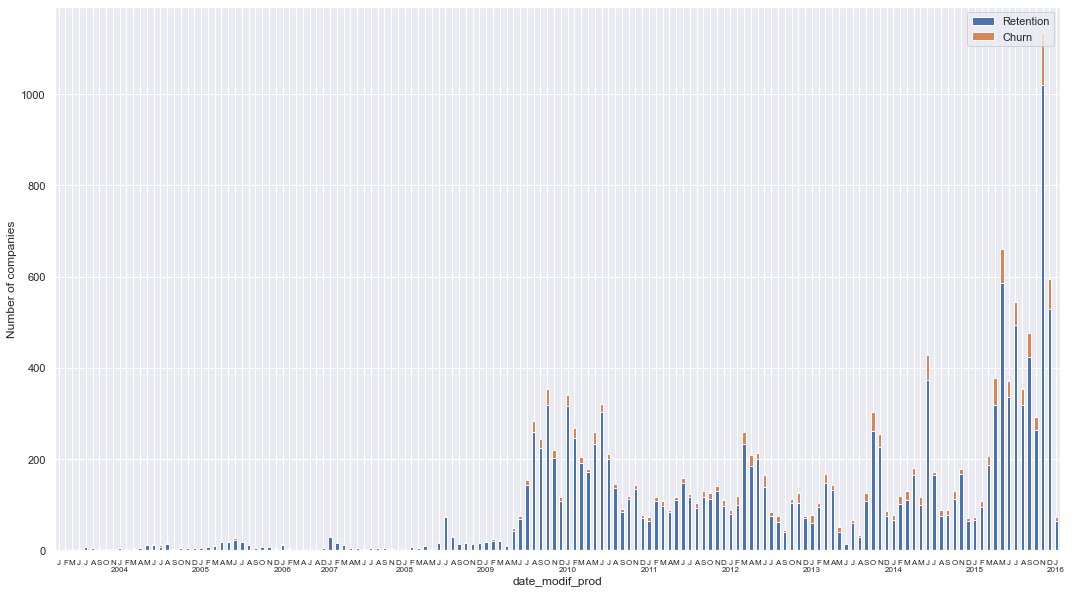

In [111]:
plot_dates(dates, "date_modif_prod", fontsize_=8)

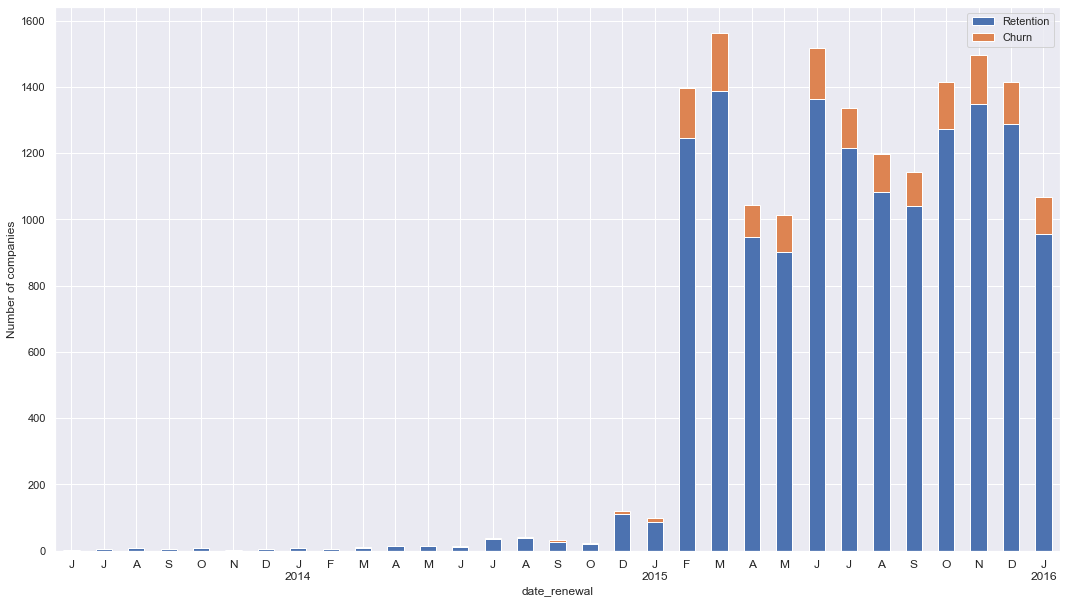

In [112]:
plot_dates(dates, "date_renewal")

As a remark in here, we can visualize the distribution of churned companies according to the date. However, this does not provide us with any useful
insight. We will create a new feature using the raw dates provided in the next exercise.

### Forecast

In [113]:
forecast = train[["id","forecast_base_bill_ele","forecast_base_bill_year",
 "forecast_bill_12m","forecast_cons","forecast_cons_12m",
 "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
 "forecast_price_energy_p1","forecast_price_energy_p2",
 "forecast_price_pow_p1","churn"]]

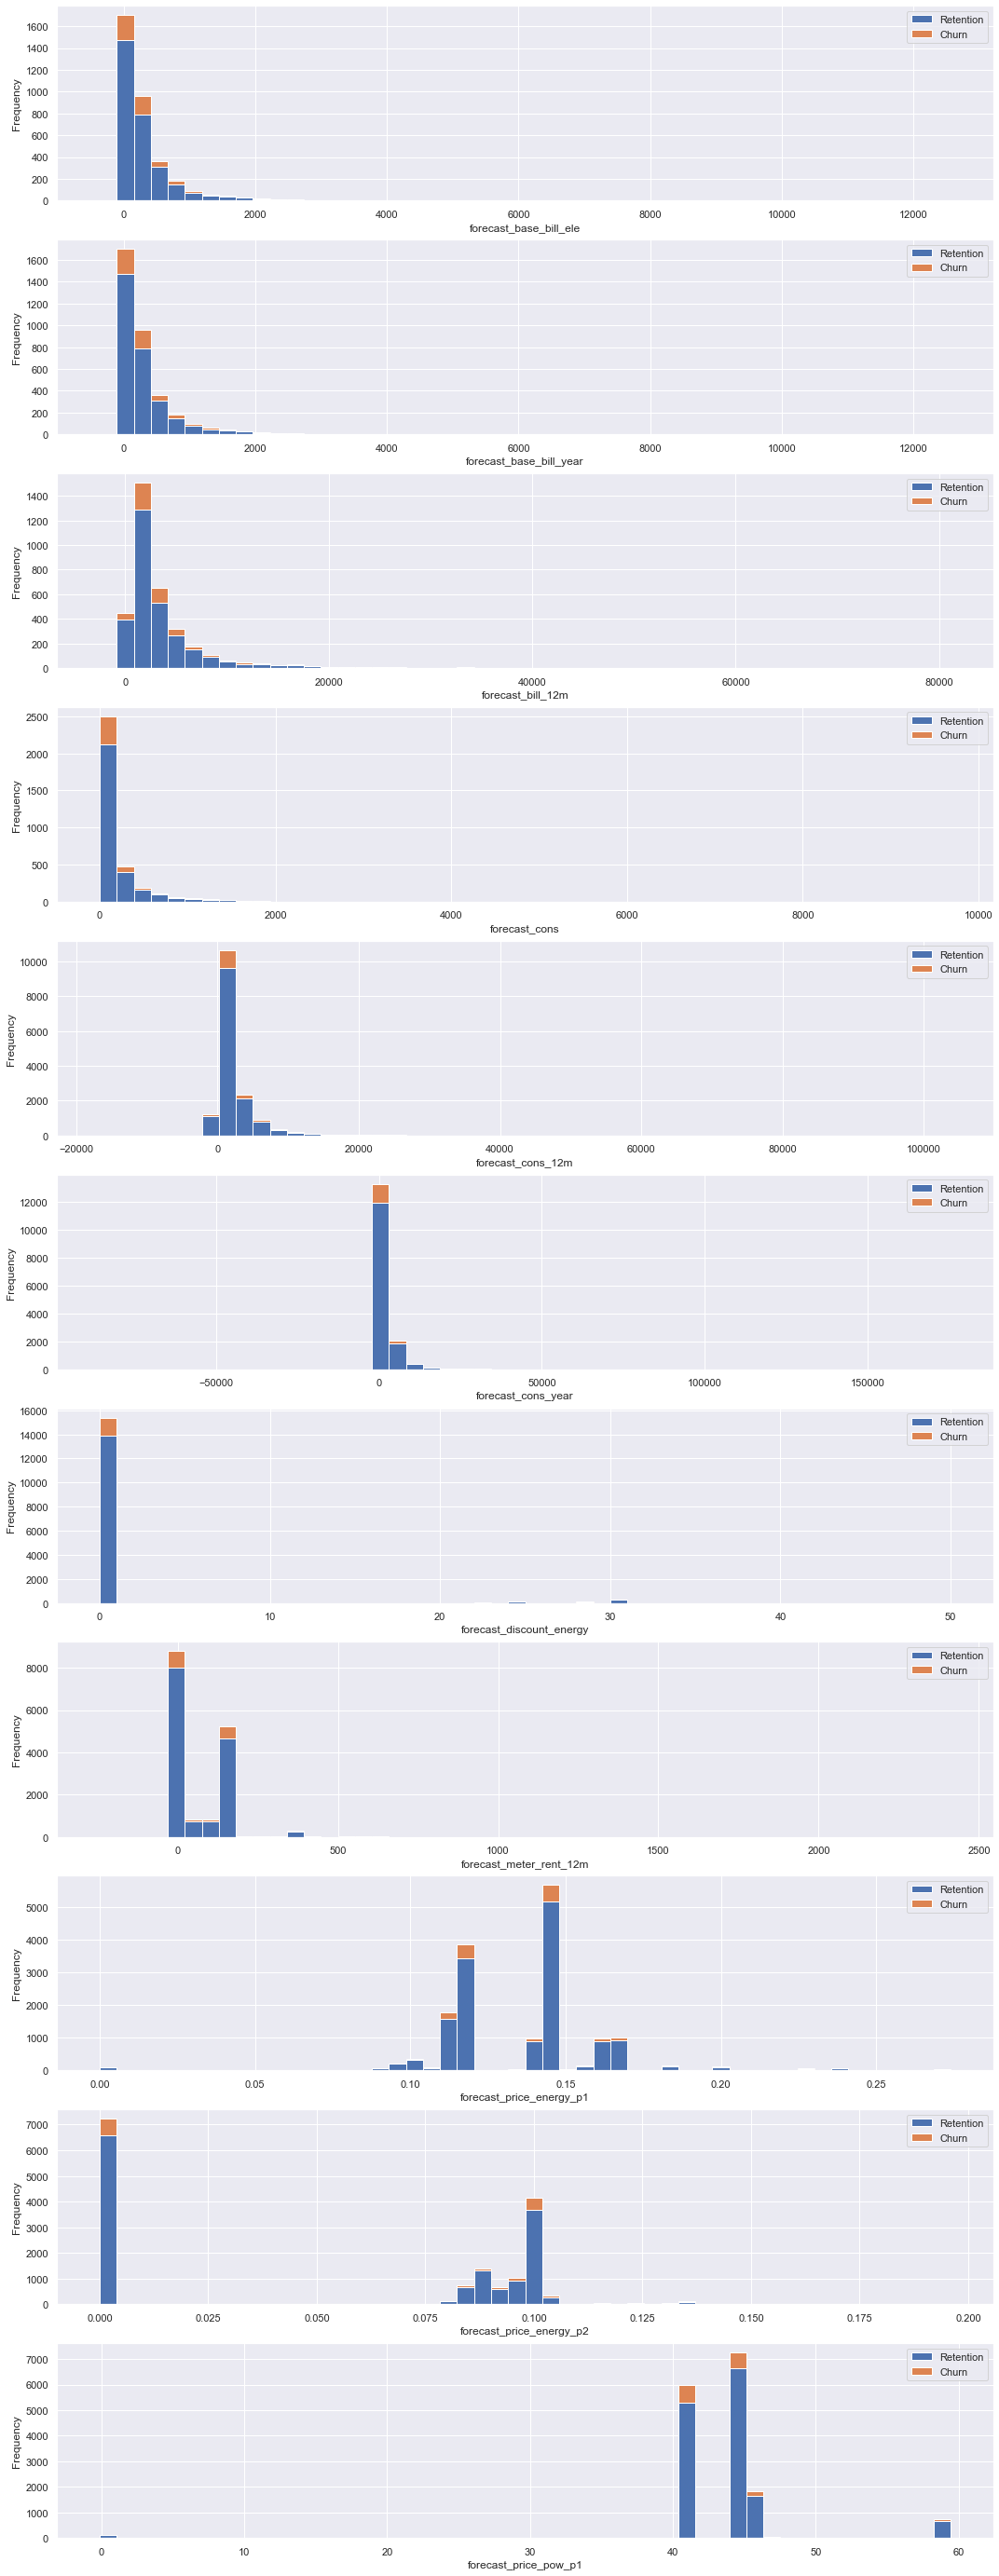

In [114]:
fig,axs=plt.subplots(nrows=11, figsize=(18,50))
plot_distribution(train, "forecast_base_bill_ele", axs[0])
plot_distribution(train, "forecast_base_bill_year", axs[1])
plot_distribution(train, "forecast_bill_12m", axs[2])
plot_distribution(train, "forecast_cons", axs[3])
plot_distribution(train, "forecast_cons_12m", axs[4])
plot_distribution(train, "forecast_cons_year", axs[5])
plot_distribution(train, "forecast_discount_energy", axs[6])
plot_distribution(train, "forecast_meter_rent_12m", axs[7])
plot_distribution(train, "forecast_price_energy_p1", axs[8])
plot_distribution(train, "forecast_price_energy_p2", axs[9])
plot_distribution(train, "forecast_price_pow_p1", axs[10])

### Contract type (electricity, gas)

In [115]:
contract_type = train[["id", "has_gas", "churn"]]

In [116]:
contract = contract_type.groupby([contract_type["churn"],
                                 contract_type["has_gas"]])["id"].count().unstack(level=0)

In [117]:
contract_percentage = (contract.div(contract.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

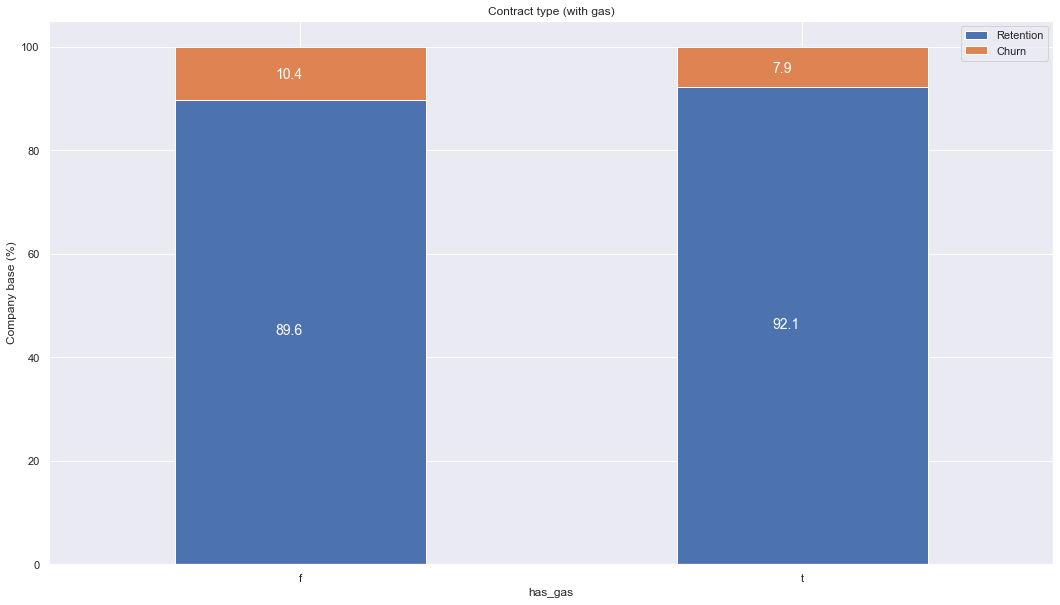

In [118]:
plot_stacked_bars(contract_percentage, "Contract type (with gas)")


### Margins

In [119]:
margin = train[["id","margin_gross_pow_ele","margin_net_pow_ele","net_margin"]]

C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


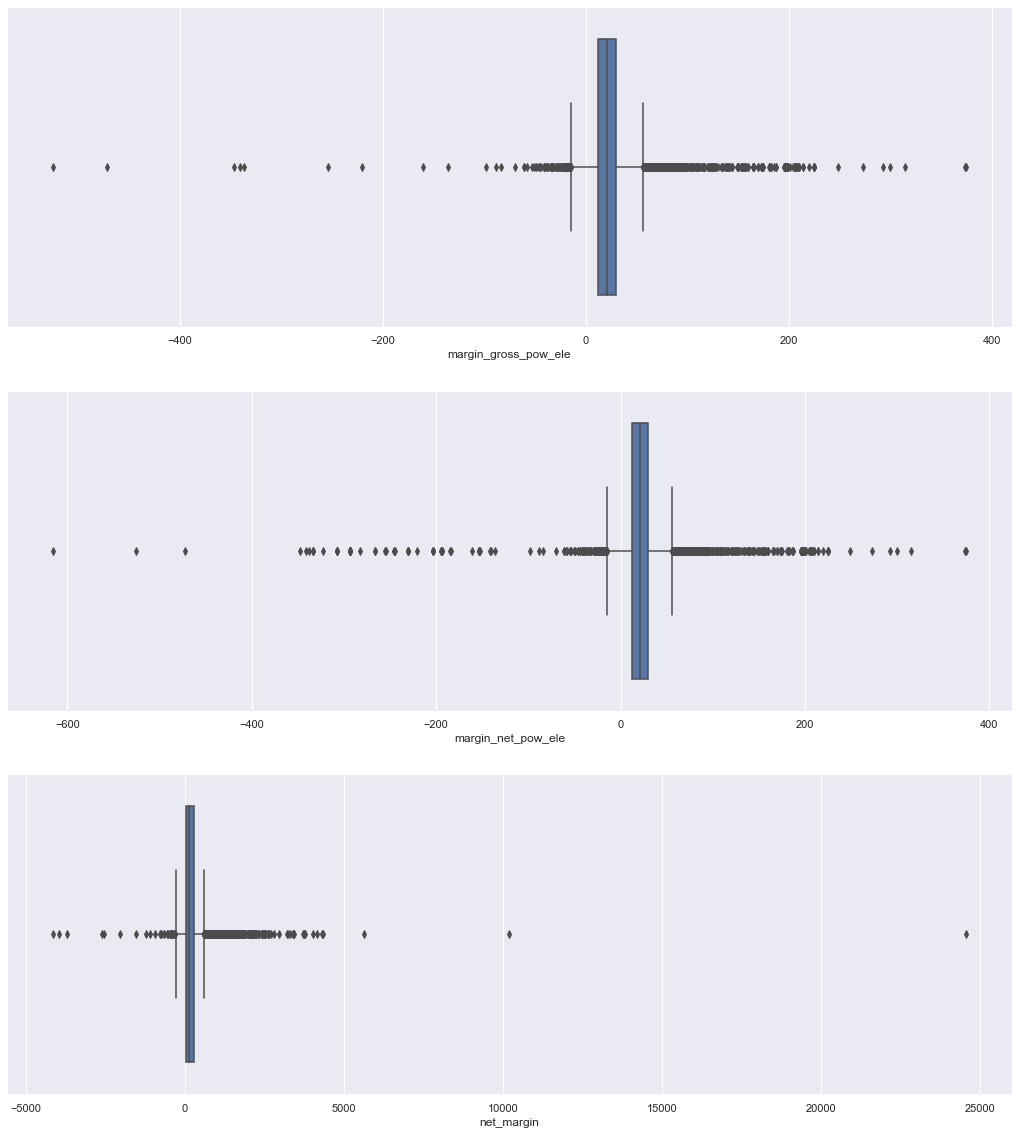

In [120]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(margin["margin_gross_pow_ele"], ax=axs[0])
sns.boxplot(margin["margin_net_pow_ele"],ax=axs[1])
sns.boxplot(margin["net_margin"], ax=axs[2])
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

### Subscribed power

In [121]:
power = train[['id', 'pow_max', 'churn']].fillna(0)

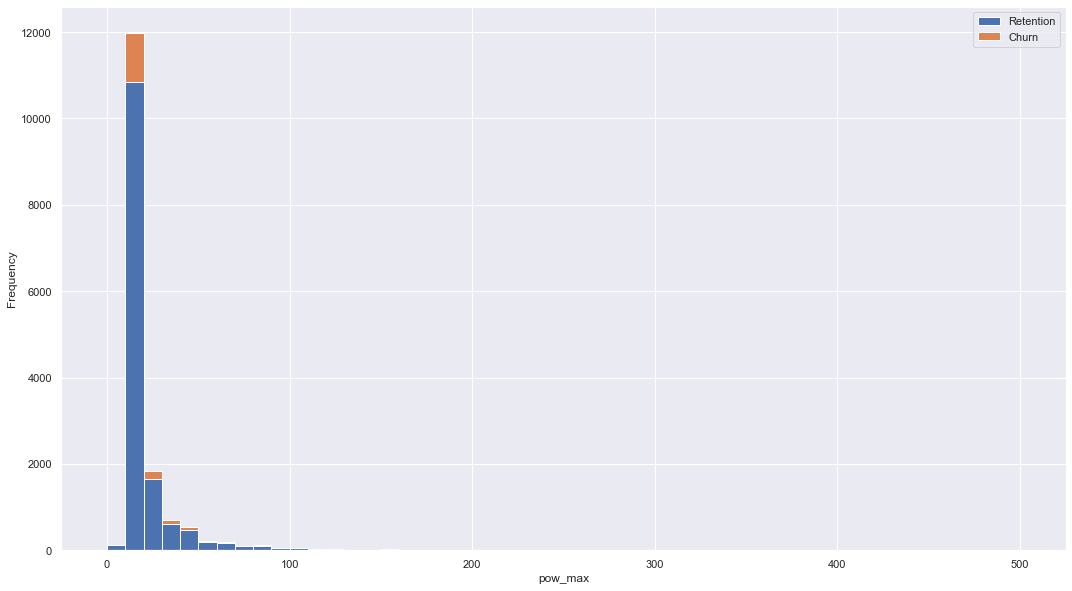

In [122]:
fig, axs = plt.subplots(nrows=1, figsize=(18,10))
plot_distribution(power, "pow_max", axs)

### Others

In [123]:
others = train[["id","nb_prod_act","num_years_antig", "origin_up", "churn"]]

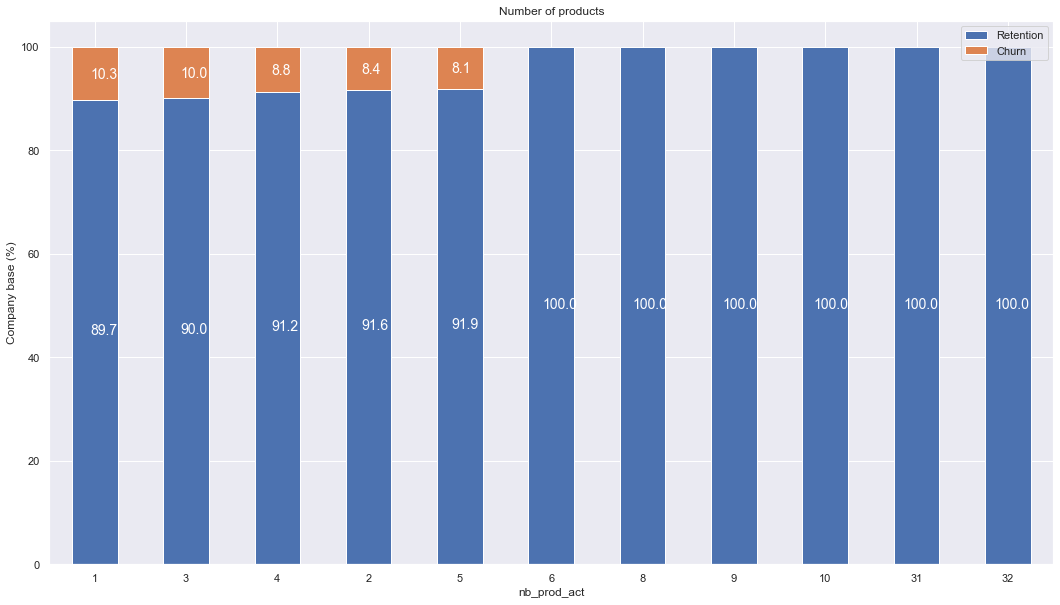

In [124]:
products = others.groupby([others["nb_prod_act"], others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

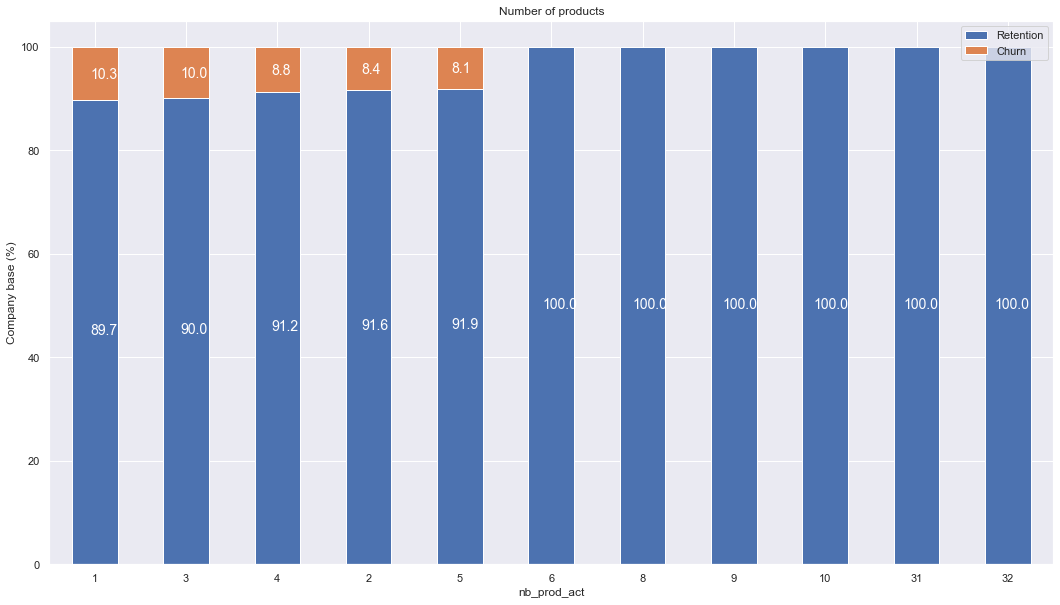

In [125]:
years_antig = others.groupby([others["num_years_antig"], others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (products.div(years_antig.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)
plot_stacked_bars(products_percentage, "Number of products")

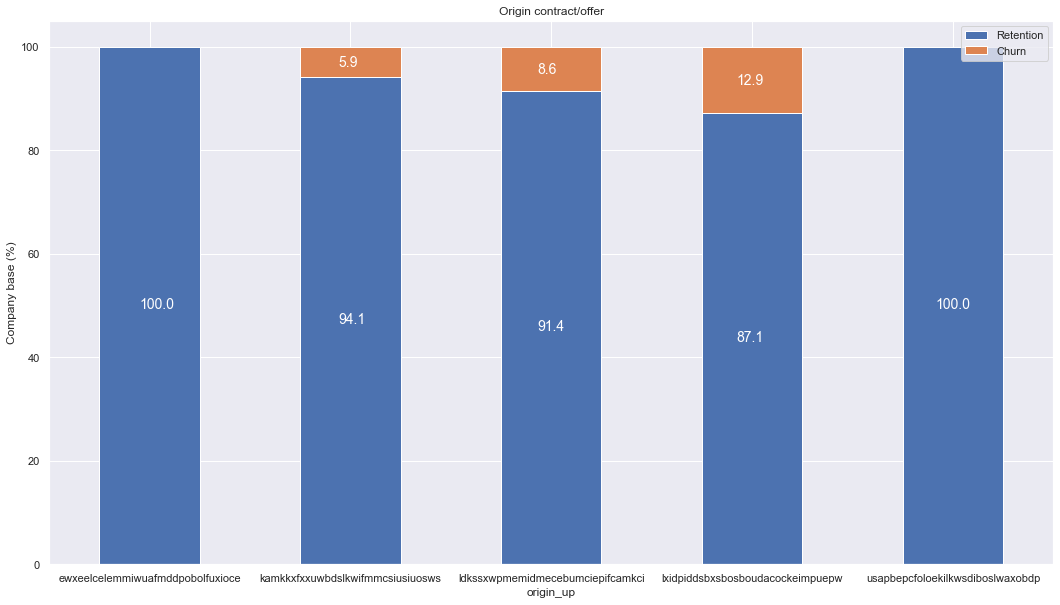

In [126]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")

### Data cleaning

#### Missing Data

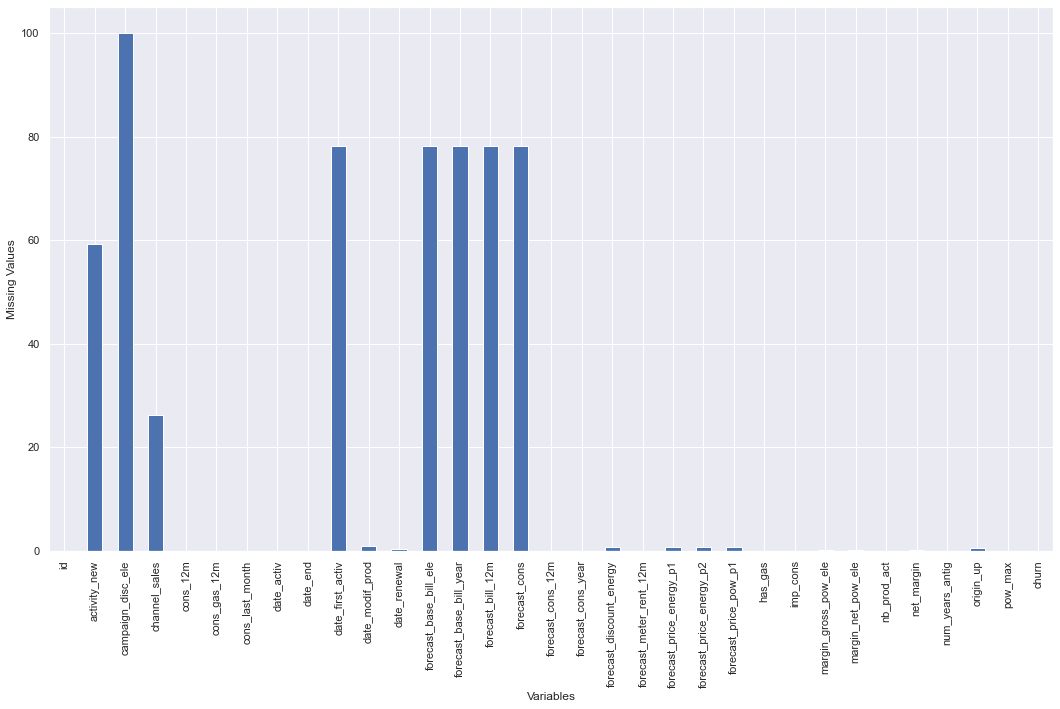

In [127]:
(train.isnull().sum()/len(train.index)*100).plot(kind="bar", figsize=(18,10))
plt.xlabel("Variables")
plt.ylabel("Missing Values")
plt.show()

For simplicity we will remove the variables with more than 60% of the values missing.

In [128]:
train.drop(columns=["campaign_disc_ele", "date_first_activ",
 "forecast_base_bill_ele","forecast_base_bill_year",
"forecast_bill_12m", "forecast_cons"], inplace=True)

#### Checking for Duplicates

In [129]:
train[train.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


### Formatting Data

Missing Dates

In [130]:
train.loc[train["date_modif_prod"].isnull(), "date_modif_prod"] =train['date_modif_prod'].value_counts().index[0]
train.loc[train["date_end"].isnull(), "date_end"] = train["date_end"].value_counts().index[0]
train.loc[train["date_renewal"].isnull(), "date_renewal"] = train["date_renewal"].value_counts().index[0]

### Missing Data

We might have some prices missing for some companies and months

In [131]:
missing_data_percentage = history_data.isnull().sum() / len(history_data.index) * 100

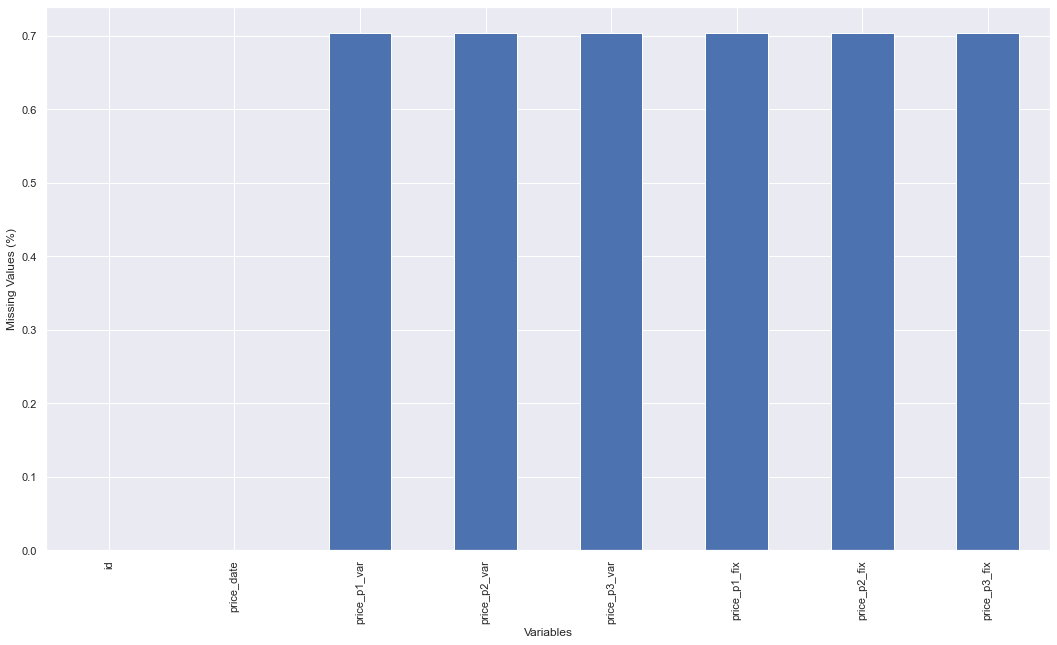

In [132]:
missing_data_percentage.plot(kind="bar", figsize=(18,10))
plt.xlabel("Variables")
plt.ylabel("Missing Values (%)")
plt.show()

There is not much data missing. Instead of removing the entries that are empty we will simply substitute them with the median .

In [133]:
history_data.isnull().sum()

id                 0
price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [134]:
history_data.loc[history_data["price_p1_var"].isnull(), "price_p1_var"] = history_data["price_p1_var"].median()

In [135]:
history_data.loc[history_data["price_p2_var"].isnull(), "price_p2_var"] = history_data["price_p2_var"].median()
history_data.loc[history_data["price_p3_var"].isnull(), "price_p3_var"] = history_data["price_p3_var"].median()
history_data.loc[history_data["price_p1_fix"].isnull(), "price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"].isnull(), "price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"].isnull(), "price_p3_fix"] = history_data["price_p3_fix"].median()

In [136]:
train["date_activ"] = pd.to_datetime(train["date_activ"], format="%d-%m-%Y")
train["date_end"] = pd.to_datetime(train["date_end"], format="%d-%m-%Y")
train["date_modif_prod"] = pd.to_datetime(train["date_modif_prod"], format="%d-%m-%Y")
train["date_renewal"] = pd.to_datetime(train["date_renewal"], format="%d-%m-%Y")

In [137]:
history_data["price_date"] = pd.to_datetime(history_data["price_date"], format="%d-%m-%Y")

C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DELL\Anaconda\lib\site-packa

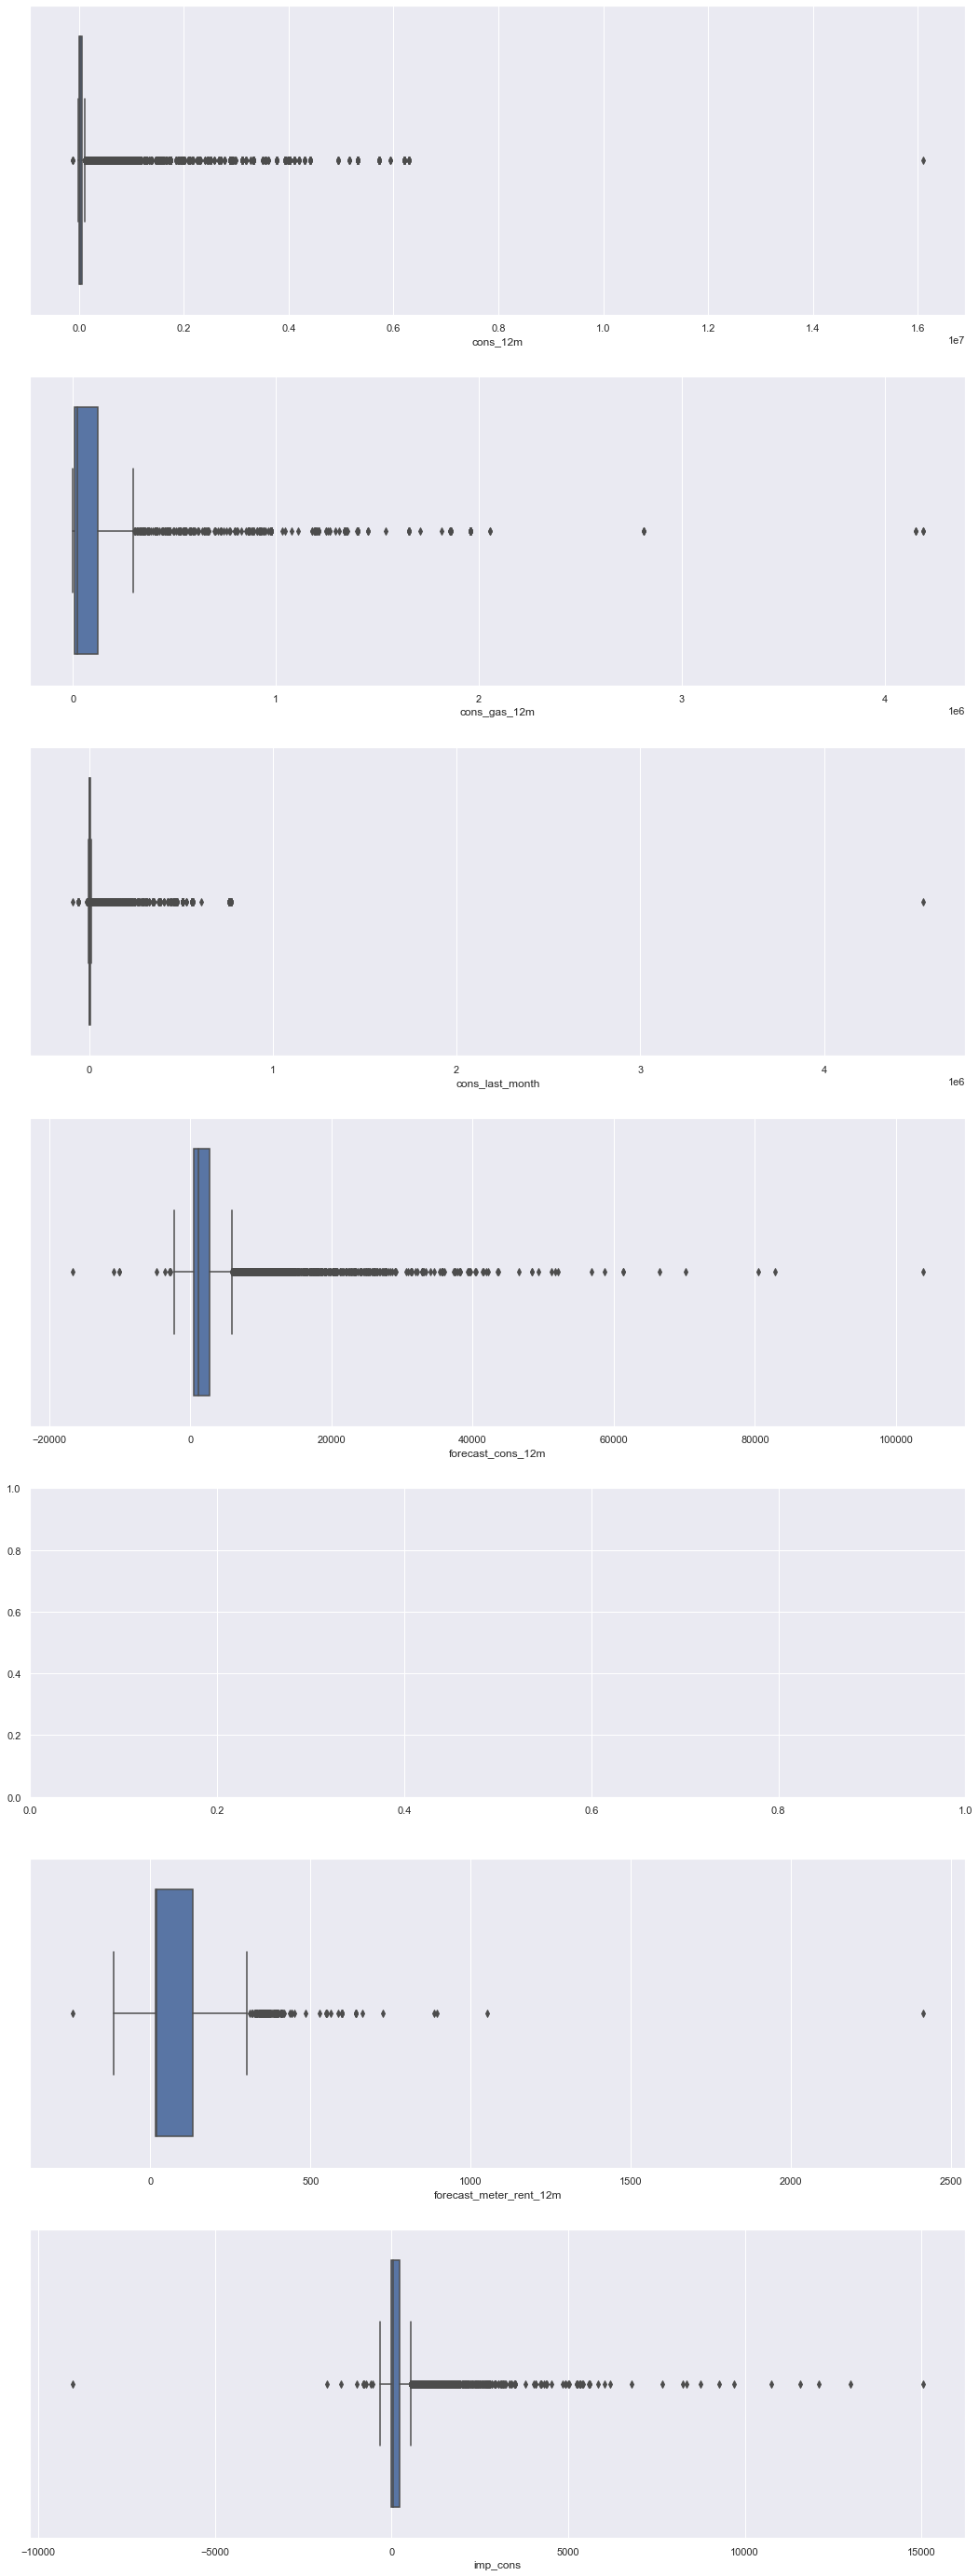

In [138]:
fig,axs = plt.subplots(nrows=7, figsize=(18,50))
sns.boxplot((train["cons_12m"].dropna()), ax=axs[0])
sns.boxplot((train[train["has_gas"]=='t']["cons_gas_12m"].dropna()), ax=axs[1])
sns.boxplot((train["cons_last_month"].dropna()), ax=axs[2])
sns.boxplot((train["forecast_cons_12m"].dropna()), ax=axs[3])
#sns.boxplot((train["forecast_cons_year"].dropna()), ax=axs[4])
sns.boxplot((train["forecast_meter_rent_12m"].dropna()), ax=axs[5])
sns.boxplot((train["imp_cons"].dropna()), ax=axs[6])
plt.show()

### Negative Data

In [139]:
history_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.332175,10.622871,6.409981
std,0.025032,0.049924,0.036298,5.419345,12.841899,7.773595
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


We can see that there are negative values for price_p1_fix , price_p2_fix and price_p3_fix .

In [140]:
history_data[(history_data.price_p1_fix < 0) | (history_data.price_p2_fix < 0) | (history_data.price_p3_fix < 0)]

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
23138,951d99fe07ca94c2139f43bc37095139,2015-03-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166
28350,f7bdc6fa1067cd26fd80bfb9f3fca28f,2015-03-01,0.131032,0.108896,0.076955,-0.162916,-0.097749,-0.065166
98575,9b523ad5ba8aa2e524dcda5b3d54dab2,2015-02-01,0.129444,0.106863,0.075004,-0.162916,-0.097749,-0.065166
113467,cfd098ee6c567eb32374c77d20571bc7,2015-02-01,0.123086,0.100505,0.068646,-0.162916,-0.097749,-0.065166
118467,51d7d8a0bf6b8bd94f8c1de7942c66ea,2015-07-01,0.128132,0.105996,0.074056,-0.162912,-0.097752,-0.065172
125819,decc0a647016e183ded972595cd2b9fb,2015-03-01,0.124937,0.102814,0.069071,-0.162916,-0.097749,-0.065166
128761,cc214d7c05de3ee17a7691e274ac488e,2015-06-01,0.124675,0.102539,0.070596,-0.162912,-0.097752,-0.065172
141011,2a4ed325054472e03cdcc9a34693be4b,2015-02-01,0.167317,0.083347,0.000000,-0.177779,0.000000,0.000000
160827,395a6f41bbd1a0f23a64f00645264e78,2015-04-01,0.121352,0.098771,0.066912,-0.162916,-0.097749,-0.065166
181811,d4a84ff4ec620151ef05bdef0cf27eab,2015-05-01,0.125976,0.103395,0.071536,-0.162916,-0.097749,-0.065166


In [141]:
history_data.loc[history_data["price_p1_fix"] < 0,"price_p1_fix"] = history_data["price_p1_fix"].median()
history_data.loc[history_data["price_p2_fix"] < 0,"price_p2_fix"] = history_data["price_p2_fix"].median()
history_data.loc[history_data["price_p3_fix"] < 0,"price_p3_fix"] = history_data["price_p3_fix"].median()

### Pickling

In [142]:
with open("train_data_processes.pickle", "wb") as t:
    pickle.dump("train_data", t)
with open("history_data_processed.pickle", "wb") as h:
    pickle.dump("history_data", h)

In [144]:
train.to_csv("train_processed.csv", index=False)
history_data.to_csv("history_data_processed.csv", index=False)